In [13]:
'''
This contains code for generating the following figures
    - "Evaluation of FACETs explanation analytics using COREX, our counterfactual region explanation index." 
    - "Evaluation of query response time with and without COREX, FACETs bit-vector based counterfactual region explanation index. Varying Nr, the number of indexed counterfactual regions.

Experiment results files needed: VaryNrects, VaryM

Results used in the paper are provided in "../results/final" if generating new results run each experiment and update the results paths below
'''
# path to each result file
index_results_path = "../results/final/vary_nrects_index.csv"
linear_results_path = "../results/final/vary_nrects_linear.csv"
m_path = "../results/final/vary_m.csv"

# path to output the figure
export_figures = True
output_dir = "./final/"
fig_save_name_1 = "index_evaluation_line"
fig_save_name_2 = "index_evaluation_bar"
fig_type = ".pdf"

In [14]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import axis

sys.path.append(os.path.abspath("../"))
from dataset import DS_DIMENSIONS, DS_NAMES
from utilities.figure_tools import (get_latest_results_directory, load_results,
                                    make_fig_directory)

plot_fontsize = 20
if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)


In [15]:
index_results = pd.read_csv(index_results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(index_results["dataset"].unique()))
index_results.head(100)

datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,100,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.476764,14.885,0.236598,0.047912,0.002396,20.0
1,cancer,FACETIndex,1000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.408169,14.100,2.543509,0.189415,0.009471,20.0
2,cancer,FACETIndex,5000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.372689,13.650,12.613572,0.735425,0.036771,20.0
3,cancer,FACETIndex,10000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.354851,13.050,25.382134,1.331975,0.066599,20.0
4,cancer,FACETIndex,20000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.343727,12.985,50.408335,2.457628,0.122881,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,vertebral,FACETIndex,60000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.085004,3.745,67.581400,0.220903,0.011045,20.0
61,vertebral,FACETIndex,70000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.083956,3.645,78.479754,0.238432,0.011922,20.0
62,vertebral,FACETIndex,80000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.083582,3.650,89.810828,0.256711,0.012836,20.0
63,vertebral,FACETIndex,90000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.082797,3.635,100.877776,0.296791,0.014840,20.0


In [16]:
linear_results = pd.read_csv(linear_results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(linear_results["dataset"].unique()))
linear_results.head()

datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,100,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.476764,14.885,0.142560,0.027612,0.001381,20.0
1,cancer,FACETIndex,1000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.408169,14.100,0.865085,0.211342,0.010567,20.0
2,cancer,FACETIndex,5000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.372689,13.650,4.099295,1.020600,0.051030,20.0
3,cancer,FACETIndex,10000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.354851,13.050,8.153496,2.015377,0.100769,20.0
4,cancer,FACETIndex,20000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.343727,12.985,16.292307,3.992346,0.199617,20.0


In [17]:
# load m results
m_results = pd.read_csv(m_path)
m_results.groupby(["dataset", "explainer", "facet_m"]).mean().reset_index()
m_results.head()

,Unnamed: 0,explainer,dataset,iteration,facet_m,index_time,sample_time,sample_time/m=4
0,0,facet,cancer,4.5,2,4.143840,0.166093,1.153949
1,1,facet,cancer,4.5,3,6.199763,0.151822,1.054794
2,2,facet,cancer,4.5,4,8.150413,0.143935,1.000000
3,3,facet,cancer,4.5,5,10.207758,0.136020,0.945011
4,4,facet,cancer,4.5,6,12.238279,0.130723,0.908213


In [18]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
ds_markers = {
    "cancer": "^",
    "glass": "o",
    "magic": "v",
    "spambase": "s",
    "vertebral": "D"
}
marker_size = 10
line_width = 4
marker_sizes = {
    "cancer": marker_size,
    "glass": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "vertebral": marker_size
}
nrects_pretty = {
    0: "0",
    100: "0.1",
    1000: "1",
    5000: "5",
    10000: "10",
    20000: "20",
    30000: "30",
    40000: "40",
    50000: "50",
    60000: "60",
    70000: "70",
    80000: "80",
    90000: "90",
    100000: "100",
}

In [19]:
# drop rows we don't want for clarity
nrects_keep = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
index_keep = index_results["n_rects"].isin(nrects_keep)
index_results = index_results[index_keep]
linear_keep = linear_results["n_rects"].isin(nrects_keep)
linear_results = linear_results[linear_keep]

In [20]:
results_dict = {
    "n_rects": index_results,
    "facet_m": m_results
}

def render_plot_ax(xfeats, yfeats, xlabels=None, ylabels=None, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}", titles=None):
    datasets = results_dict[xfeats[0]]["dataset"].unique()
    fig = plt.figure(figsize=[32, 4])
    ax = fig.subplots(nrows=1, ncols=5)
    
    for i in range(len(yfeats)):
        xfeature = xfeats[i]
        yfeature =  yfeats[i]
        for ds in datasets:
            is_ds = results_dict[xfeature]["dataset"] == ds
            matching_rows = is_ds

            xvals = results_dict[xfeature][matching_rows][xfeature]
            if xfeature == "n_rects":
                xvals = [nrects_pretty[_] for _ in xvals]

            ax[i].plot(xvals, results_dict[xfeature][matching_rows][yfeature], label=yfeature, marker=ds_markers[ds], lw=line_width, ms=marker_size)
            
            ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
            if xfeature == "n_rects":
                ax[i].set_xticks(xvals)
                xtick_labels = [str(_) for _ in xvals]
                ax[i].set_xticklabels(xtick_labels, fontdict={"horizontalalignment": "center"}, rotation=90)
            if titles is not None:
                ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), titles[i]), fontdict={"fontsize": plot_fontsize}) 
            if ylabels is not None:
                ax[i].set_ylabel(ylabels[i], fontdict={"fontsize": plot_fontsize})
            if xlabels is not None:
                ax[i].set_xlabel(xlabels[i], fontdict={"fontsize": plot_fontsize})
            ax[i].set_xlim(xrange)
            if yticks_multi is not None:
                ax[i].set_yticks(yticks_multi[i])
                ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
            if yrange_multi is not None:
                bottom = yrange_multi[i][0]
                top = yrange_multi[i][1]
                if bottom is not None:
                    ax[i].set_ylim(bottom=bottom)
                if top is not None:
                    ax[i].set_ylim(top=top)

    lines, labels = ax[0].get_legend_handles_labels()
    fig.subplots_adjust(wspace=0.18)
    legend_labels = [datasets[_].upper() for _ in range(len(datasets))]
    fig.legend(lines, legend_labels, loc="center left", bbox_to_anchor=(0.025, 0.5), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize})
    if save_name is not None:
        fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight")

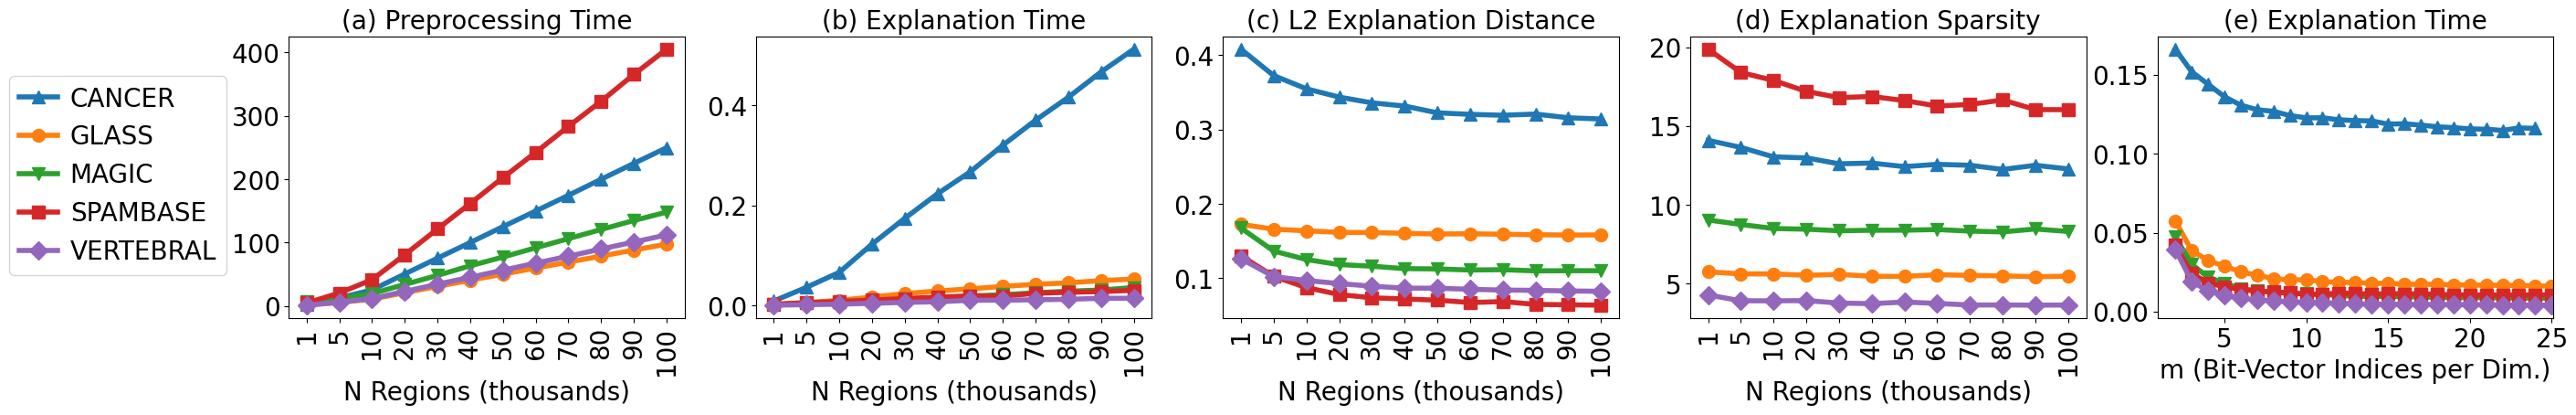

In [21]:
ylabels = ["Preprocessing Time", "Explanation Time", "L2 Explanation Distance", "Explanation Sparsity", "Explanation Time"]
xlabels = ["N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "m (Bit-Vector Indices per Dim.)"]
titles = ["Preproc Time vs N Regions", "Expl Time vs N Regions", "Expl Time vs N Regions", "Expl Sparsity vs N Regions", "Expl Timve vs m"]
xfeats = ["n_rects", "n_rects", "n_rects", "n_rects", "facet_m"]
yfeats = ["prep_time", "sample_time", "avg_dist", "avg_length", "sample_time"]
render_plot_ax(xfeats=xfeats, yfeats=yfeats, ylabels=None, xlabels=xlabels, titles=ylabels, save_name=fig_save_name_1)

In [22]:
def render_bar_ax(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}"):
    datasets = index_results["dataset"].unique()
    fig = plt.figure(figsize=[32, 3.8])
    ax = fig.subplots(nrows=1, ncols=5, sharex="all") #nrows=1, ncols=5, sharex="all")
       
    for i in range(len(datasets)):
        ds = datasets[i]
                
        index_match = (index_results["dataset"] == ds) & (index_results["explainer"] == "FACETIndex")
        linear_match = (linear_results["dataset"] == ds) & (linear_results["explainer"] == "FACETIndex")
        data1 = index_results[index_match][yfeature]
        data2 = linear_results[linear_match][yfeature]
        width =0.3
        ax[i].bar(np.arange(len(data1)), data1, width=width, )
        ax[i].bar(np.arange(len(data2))+ width, data2, width=width)
        
        xticks = [_ + width/2 for _ in range(len(linear_results[linear_match]["n_rects"]))]
        ax[i].set_xticks(xticks,)
        xtick_labels = [nrects_pretty[_] for _ in linear_results[linear_match]["n_rects"]]
        ax[i].set_xticklabels(xtick_labels, rotation=90, fontdict={"horizontalalignment": "center"})        
        ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
        
        ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), datasets[i].upper()), fontdict={"fontsize": plot_fontsize}) 
        if xrange is not None:
            ax[i].set_xlim(xrange)
        if yticks_multi is not None:
            ax[i].set_yticks(yticks_multi[i])
            ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
        if yrange_multi is not None:
            bottom = yrange_multi[i][0]
            top = yrange_multi[i][1]
            if bottom is not None:
                ax[i].set_ylim(bottom=bottom)
            if top is not None:
                ax[i].set_ylim(top=top)

    ax[0].set_ylabel(ylabel, fontsize=plot_fontsize)
    
    fig.subplots_adjust(wspace=0.18)
    legend_labels = ["FACET\nCOREX", "FACET\nLinear\nScan"]
    fig.legend(labels=legend_labels, loc="center left", handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize}, bbox_to_anchor=(0.025, 0.45))
    if save_name is not None:
        fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight")

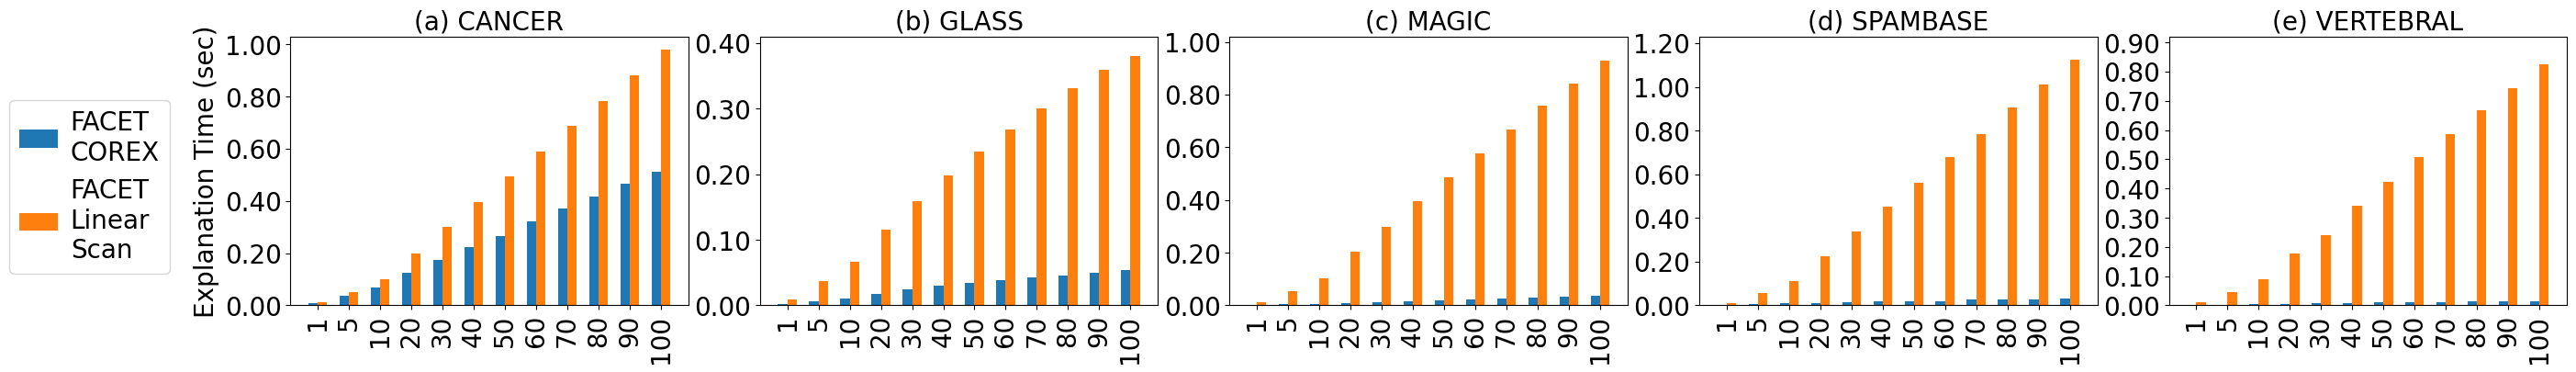

In [23]:
yticks_multi = [np.arange(0.0, 1.1, 0.2), np.arange(0.0, 0.41, 0.1), np.arange(0.0, 1.1, 0.2),
                np.arange(0, 1.3, 0.2), np.arange(0.0, 0.91, 0.1)]
yrange_multi = [[0.0, 1.03], [0.0, 0.41], [0.0, 1.02], [0.0, 1.23], [0.0, 0.92]]
render_bar_ax(xfeature="n_rects", yfeature="sample_time", xlabel="N Regions (thousands)", ylabel="Explanation Time (sec)", title="Explanation Time vs NRegions", save_name=fig_save_name_2, yrange_multi=yrange_multi, yticks_multi=yticks_multi)